# Pincipal Component Analysis in scikit-learn - Lab

## Introduction

Now that you've seen a brief introduction to PCA, it's time to try implementing the algorithm on your own.

## Objectives

You will be able to:

- Perform PCA in Python and scikit-learn using Iris dataset
- Measure the impact of PCA on the accuracy of classification algorithms
- Plot the decision boundary of different classification experiments to visually inspect their performance. 

## Iris Dataset

To practice PCA, you'll take a look at the iris dataset. Run the cell below to load it.

In [47]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [48]:
# load the data
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
# solution version
# # Load necessary libraries
# import pandas as pd 
# import numpy as np
# import matplotlib.pyplot as plt

# # loading dataset into Pandas DataFrame
# iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#                  , names=['sepal length','sepal width','petal length','petal width','target'])
# iris.head()

In a minute, you'll perform PCA and visualize the datasets principle components. Before, its helpful to get a little more context regarding the data that you'll be working with. Run the cell below in order to visualize the pairwise feature plots. With this, notice how the target labels are easily separable by any one of the given features.

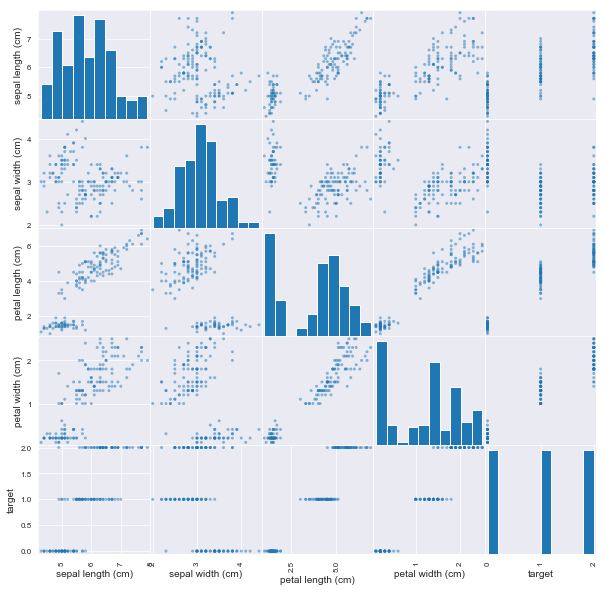

In [50]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

In [53]:
# Create features and Target dataset
target = df['target']
target.head()


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [55]:
features = df.drop('target', axis = 1)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
# Standardize the features
features_norm = (features - features.mean()) / (features.max() - features.min())



In [60]:
features_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.206481,0.184444,-0.399661,-0.416389
1,-0.262037,-0.023889,-0.399661,-0.416389
2,-0.317593,0.059444,-0.416610,-0.416389
3,-0.345370,0.017778,-0.382712,-0.416389
4,-0.234259,0.226111,-0.399661,-0.416389


In [61]:
# review standard scaler
features_norm2 = pd.DataFrame(StandardScaler().fit_transform(features))
features_norm2.columns = features.columns
features_norm2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## PCA Projection to 2D Space

Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

- Initialize an instance of PCA from scikit-learn with 2 components
- Fit the data to the model
- Extract the first 2 principal components from the trained model

In [62]:
# Run the PCA algorithm
pca = PCA(n_components=2)

# transformed = pca.fit_transform(features_norm)
transformed = pca.fit_transform(features_norm2)

pca_df = pd.DataFrame(data=transformed, columns = ['PC1','PC2'])


In [63]:
pca_df.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


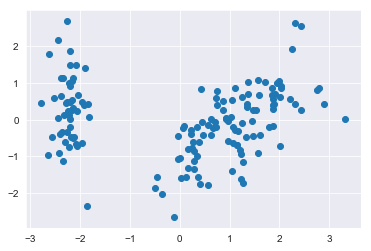

In [64]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])

To visualize the components, it will be useful to also look at the target associated with the particular observation. 
As such, append the target (flower name) to the principal components in a pandas dataframe.

In [65]:
# Create a new dataset from principal components 
pca_df['target'] = target


In [66]:
pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [67]:
pca_df.target.unique()

array([0, 1, 2])

In [68]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
pca_df['target'] = iris.target_names[pca_df['target']]


In [70]:
pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


Great, you now have a set of two dimensions, reduced from four against our target variable, the flower name.

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples

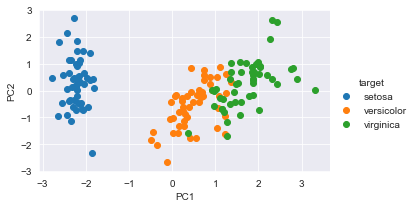

In [71]:
# Principal Componets scatter plot

fg = sns.FacetGrid(data=pca_df, hue='target', aspect=1.61)
fg.map(plt.scatter, 'PC1', 'PC2').add_legend();


## Explained Variance


You can see above that the three classes in the dataset are fairly well separable. As such, this compressed representation of the data is probably sufficient for the classification task at hand. Compare the variance in the overall dataset to that captured from your two primary components.

In [72]:
# Calculate the variance explained by pricipal components

pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [73]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207])

These 2 features can explain 95.8% of the variance in the data.

As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

## Compare Performance of an Classifier with PCA

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset.

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a trai/test split of 80/20
- For reproducability of results, set random state =9 for the split
- Time the process for splitting, training and making prediction

In [ ]:
# classification complete Iris dataset

# Your code here 



Great , so you can see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may different randomly based on the load on your cpu and number of processes running on your PC. 

Now repeat the above process for dataset made from principal components 
- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a trai/test split of 80/20
- For reproducability of results, set random state =9 for the split
- Time the process for splitting, training and making prediction

In [ ]:
# Run the classifer on PCA'd data


# Your code here 



While some accuracy is loss in this representation, the training time has vastly improved. In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

In [34]:
#testing

#eigen vectors
v1 = -0.23197069
v2 = -0.52532209
v3 = -0.8186735

1*v1 + 2*v2 + 3* v3

-3.73863537

In [35]:
#eigen values
v1 * 1.61168440e+01    

-3.73863542330236

## Summary 

In this lab you applied PCA to the popular Iris dataset. You looked at performance of a simple classifier and impact of PCA on it. From here, you'll continue to explore PCA at more fundamental levels.